### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split , GridSearchCV 

from sklearn import tree
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score , confusion_matrix , roc_curve , roc_auc_score ,auc, precision_score
from sklearn.metrics import classification_report,cohen_kappa_score, plot_roc_curve

from sklearn.preprocessing import LabelEncoder




### Importing data file 

In [2]:
df = pd.read_csv("students.df.cleaned.ml.csv")

### Viewing the dataset

In [3]:
df.head()

,Unnamed: 0,MaritalStatus,ApplicationMode,ApplicationOrder,Course,DaytimeEveningAttendance,PreviousQualification,Nationality,MothersQualification,FathersQualification,...,CurricularUnits2ndSemCredited,CurricularUnits2ndSemEnrolled,CurricularUnits2ndSemEvaluations,CurricularUnits2ndSemapproved,CurricularUnits2ndSemGrade,CurricularUnits2ndSemWithoutEvaluations,UnemploymentRate,InflationRate,GDP,Target
0,1,1,8,5,2,1,1,1,13,-1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,2,1,-1,1,11,1,1,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,3,1,1,5,5,1,1,1,22,27,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,4,1,8,2,15,1,1,1,23,27,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,5,2,12,1,3,0,1,1,22,28,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [4]:
df.tail()

,Unnamed: 0,MaritalStatus,ApplicationMode,ApplicationOrder,Course,DaytimeEveningAttendance,PreviousQualification,Nationality,MothersQualification,FathersQualification,...,CurricularUnits2ndSemCredited,CurricularUnits2ndSemEnrolled,CurricularUnits2ndSemEvaluations,CurricularUnits2ndSemapproved,CurricularUnits2ndSemGrade,CurricularUnits2ndSemWithoutEvaluations,UnemploymentRate,InflationRate,GDP,Target
3625,4420,1,1,-1,15,1,1,1,1,1,...,0,6,8,5,12.66667,0,15.5,2.8,-4.06,1
3626,4421,1,1,2,15,1,1,-1,1,1,...,0,6,6,2,11.00000,0,11.1,0.6,2.02,0
3627,4422,1,1,1,12,1,1,1,22,27,...,0,8,9,1,13.50000,0,13.9,-0.3,0.79,0
3628,4423,1,1,1,9,1,1,1,22,27,...,0,5,6,5,12.00000,0,9.4,-0.8,-3.12,1
3629,4424,1,-1,1,15,1,1,-1,23,27,...,0,6,6,6,13.00000,0,12.7,3.7,-1.70,1


### Checking the datatypes

In [5]:
print(df.dtypes)

Unnamed: 0                                   int64
MaritalStatus                                int64
ApplicationMode                              int64
ApplicationOrder                             int64
Course                                       int64
DaytimeEveningAttendance                     int64
PreviousQualification                        int64
Nationality                                  int64
MothersQualification                         int64
FathersQualification                         int64
MothersOccupation                            int64
FathersOccupation                            int64
Displaced                                    int64
EducationalSpecialNeeds                      int64
Debtor                                       int64
TuitionFeesUpToDate                          int64
Gender                                       int64
ScholarshipHolder                            int64
AgeAtEnrollment                              int64
International                  

### Defining categorical variables in the datatype

In [6]:
cat_cols = ['MaritalStatus', 'ApplicationMode', 'ApplicationOrder' ,'Course', 'DaytimeEveningAttendance' , 'PreviousQualification' , 
       'Nationality' , 'MothersQualification' , 'FathersQualification' , 'MothersOccupation' , 'FathersOccupation'  , 'Displaced' ,
        'EducationalSpecialNeeds' , 'Debtor' ,'TuitionFeesUpToDate' , 'Gender'  ,'ScholarshipHolder','Target' ]

In [7]:
for col in cat_cols:
    df[col] = pd.Categorical(df[col])

In [8]:
print(df.dtypes)

Unnamed: 0                                    int64
MaritalStatus                              category
ApplicationMode                            category
ApplicationOrder                           category
Course                                     category
DaytimeEveningAttendance                   category
PreviousQualification                      category
Nationality                                category
MothersQualification                       category
FathersQualification                       category
MothersOccupation                          category
FathersOccupation                          category
Displaced                                  category
EducationalSpecialNeeds                    category
Debtor                                     category
TuitionFeesUpToDate                        category
Gender                                     category
ScholarshipHolder                          category
AgeAtEnrollment                               int64
Internationa

### Checking the unique values in Target Variable named as "Target"

In [9]:
df["Target"].unique()

[0, 1]
Categories (2, int64): [0, 1]

### O => Dropout 1 => Graduate

In [10]:
df.groupby('Target')['Target'].count()    

Target
0    1421
1    2209
Name: Target, dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'MaritalStatus', 'ApplicationMode', 'ApplicationOrder',
       'Course', 'DaytimeEveningAttendance', 'PreviousQualification',
       'Nationality', 'MothersQualification', 'FathersQualification',
       'MothersOccupation', 'FathersOccupation', 'Displaced',
       'EducationalSpecialNeeds', 'Debtor', 'TuitionFeesUpToDate', 'Gender',
       'ScholarshipHolder', 'AgeAtEnrollment', 'International',
       'CurricularUnits1stSemCredited', 'CurricularUnits1stSemEnrolled',
       'CurricularUnits1stSemEvaluations', 'CurricularUnits1stSemApproved',
       'CurricularUnits1stSemGrade', 'CurricularUnit1stSemWithoutEvaluations',
       'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
       'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemapproved',
       'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
       'UnemploymentRate', 'InflationRate', 'GDP', 'Target'],
      dtype='object')

### Dropping extra column: 'Unamed: 0'

In [12]:
df = df.drop('Unnamed: 0' , axis = 1)

In [13]:
print(df.dtypes)

MaritalStatus                              category
ApplicationMode                            category
ApplicationOrder                           category
Course                                     category
DaytimeEveningAttendance                   category
PreviousQualification                      category
Nationality                                category
MothersQualification                       category
FathersQualification                       category
MothersOccupation                          category
FathersOccupation                          category
Displaced                                  category
EducationalSpecialNeeds                    category
Debtor                                     category
TuitionFeesUpToDate                        category
Gender                                     category
ScholarshipHolder                          category
AgeAtEnrollment                               int64
International                                 int64
CurricularUn

### Seperating Target variable from other variables

In [17]:
x = df.drop(columns ="Target",axis =1)

In [18]:
x

,MaritalStatus,ApplicationMode,ApplicationOrder,Course,DaytimeEveningAttendance,PreviousQualification,Nationality,MothersQualification,FathersQualification,MothersOccupation,...,CurricularUnit1stSemWithoutEvaluations,CurricularUnits2ndSemCredited,CurricularUnits2ndSemEnrolled,CurricularUnits2ndSemEvaluations,CurricularUnits2ndSemapproved,CurricularUnits2ndSemGrade,CurricularUnits2ndSemWithoutEvaluations,UnemploymentRate,InflationRate,GDP
0,1,8,5,2,1,1,1,13,-1,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,-1,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,-1,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666670,0,15.5,2.8,-4.06
3626,1,1,2,15,1,1,-1,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
3627,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
3628,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [19]:
y = df["Target"]

In [20]:
print(y.dtype)

category


### The data-type of the Target variable is Categorical

### Performing Label Encoding on the Target Variable

#### Creating a Label Encoder Object

In [21]:
le = LabelEncoder()

#### Fit the encoder to the target variable and transform the values

In [22]:
y_encoded = le.fit_transform(y)

In [23]:
print(y_encoded.dtype)

int64


### Split the dataset into train and test 

In [24]:
x_train , x_test , y_train, y_test = train_test_split (x , y_encoded , test_size = .20 , random_state=20)
                                                      
x_train

,MaritalStatus,ApplicationMode,ApplicationOrder,Course,DaytimeEveningAttendance,PreviousQualification,Nationality,MothersQualification,FathersQualification,MothersOccupation,...,CurricularUnit1stSemWithoutEvaluations,CurricularUnits2ndSemCredited,CurricularUnits2ndSemEnrolled,CurricularUnits2ndSemEvaluations,CurricularUnits2ndSemapproved,CurricularUnits2ndSemGrade,CurricularUnits2ndSemWithoutEvaluations,UnemploymentRate,InflationRate,GDP
757,2,12,1,3,0,-1,1,22,27,-1,...,0,0,6,0,0,0.000000,0,9.4,-0.8,-3.12
3568,1,15,1,6,1,14,1,3,1,5,...,0,1,6,17,5,11.857140,0,12.4,0.5,1.79
171,1,1,2,12,1,1,1,23,1,8,...,0,0,8,8,7,12.642857,0,12.7,3.7,-1.70
2708,1,1,1,2,1,1,1,13,14,6,...,0,0,0,0,0,0.000000,0,13.9,-0.3,0.79
1976,2,12,1,3,0,1,1,22,27,10,...,0,0,6,6,6,14.166670,0,9.4,-0.8,-3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,1,12,1,11,1,1,1,22,27,5,...,0,5,9,14,7,13.000000,0,10.8,1.4,1.74
3295,1,8,5,11,1,1,1,23,1,6,...,0,0,5,10,0,0.000000,0,10.8,1.4,1.74
271,1,-1,1,12,1,1,1,22,27,8,...,0,0,8,8,7,13.058571,0,10.8,1.4,1.74
2522,2,-1,1,9,1,-1,1,22,27,10,...,0,9,14,16,9,12.222220,0,9.4,-0.8,-3.12


In [25]:
print(y_train)


[0 1 1 ... 1 0 1]


### Applying Decision Tree Model

In [26]:
dt_model = DecisionTreeClassifier()

In [27]:
dt_model.fit(x_train , y_train)

DecisionTreeClassifier()

### Visualising Decision Tree (dt_model)

[Text(0.26161834143397705, 0.98, 'X[29] <= 3.5\ngini = 0.478\nsamples = 2904\nvalue = [1149, 1755]'),
 Text(0.10294885177453027, 0.94, 'X[21] <= 0.5\ngini = 0.17\nsamples = 928\nvalue = [841, 87]'),
 Text(0.046711899791231734, 0.9, 'X[15] <= 0.5\ngini = 0.5\nsamples = 117\nvalue = [60, 57]'),
 Text(0.016701461377870562, 0.86, 'X[33] <= 3.25\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.008350730688935281, 0.82, 'X[32] <= 15.85\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.0041753653444676405, 0.78, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.012526096033402923, 0.78, 'X[11] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.008350730688935281, 0.74, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.016701461377870562, 0.74, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.025052192066805846, 0.82, 'X[16] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.020876826722338204, 0.78, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.02

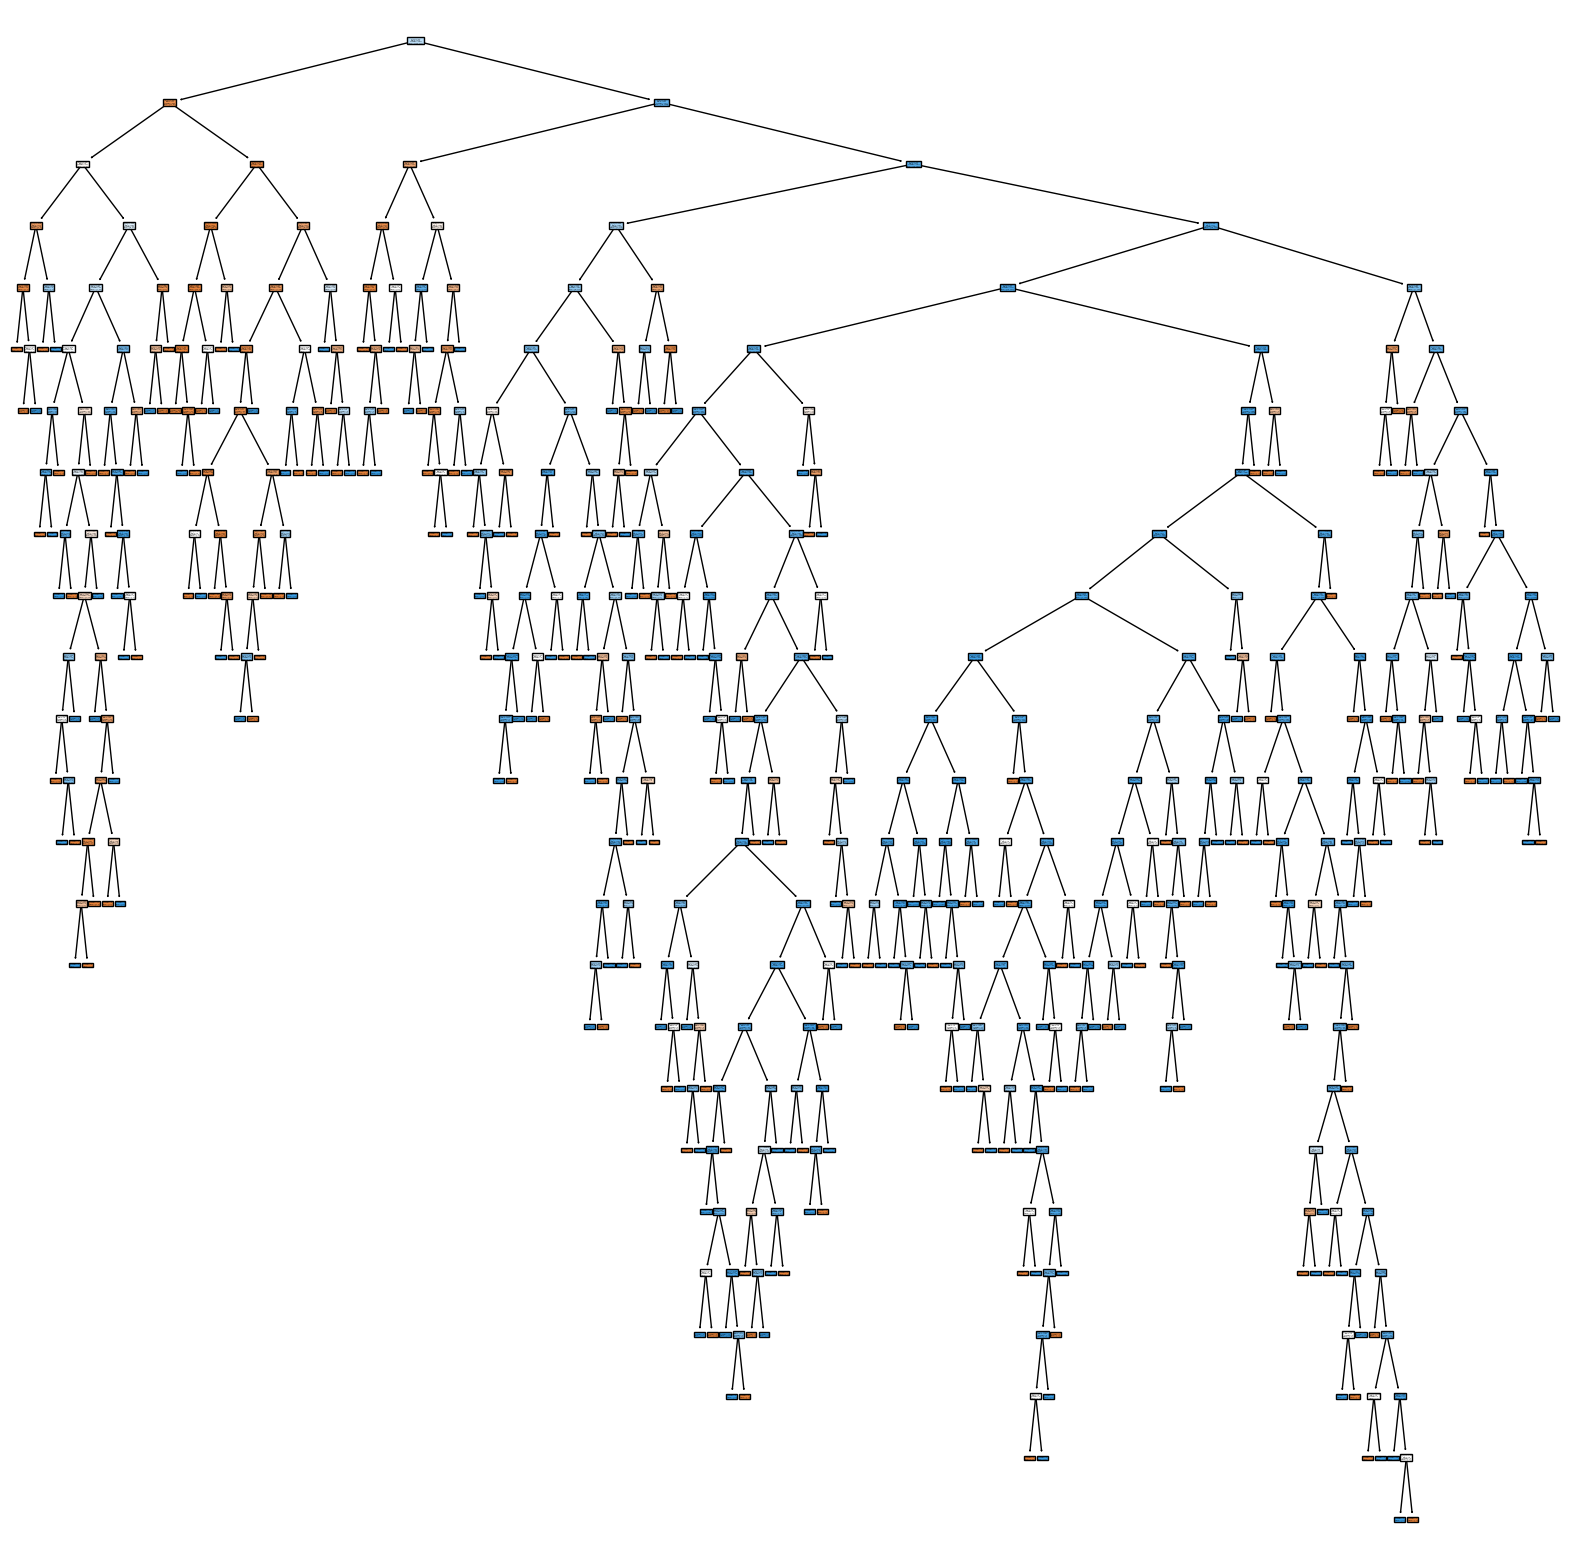

In [24]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model , filled=True)

### For better visualisation, using first 30 rows from the dataset

In [79]:
df1=df.head(30)
x1=df1.drop(columns='Target')
y1=df1.Target


In [80]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

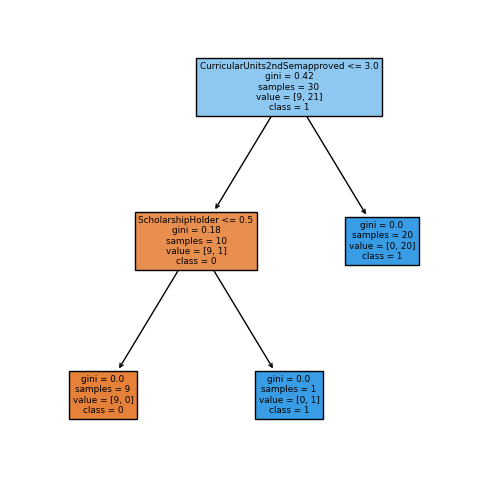

In [61]:
plt.figure(figsize=(6,6))
tree.plot_tree(dt_model1 , filled=True,feature_names=x1.columns, class_names = [str(i) for i in set(y1)])
plt.savefig('dt_small_image2.jpeg' )

In [81]:
set(y1)


{0, 1}

### Predicting Results on Test data set


In [82]:
dt_model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,

### Model Accuracy

In [50]:
dt_model.score(x_test , y_test)

0.8746556473829201

In [51]:
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_28 <= 3.50
|   |--- feature_20 <= 0.50
|   |   |--- feature_14 <= 0.50
|   |   |   |--- feature_32 <= 3.25
|   |   |   |   |--- feature_31 <= 15.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_31 >  15.85
|   |   |   |   |   |--- feature_17 <= 25.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_17 >  25.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_32 >  3.25
|   |   |   |   |--- feature_10 <= 9.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_10 >  9.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_14 >  0.50
|   |   |   |--- feature_17 <= 25.50
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- feature_31 <= 8.25
|   |   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |   |--- feature_1 <= 0.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   

### Decision Tree Model with Entropy

In [28]:
dt_entropy = DecisionTreeClassifier(criterion ="entropy", max_depth=3, ccp_alpha=0.2 )

In [29]:
dt_entropy.fit(x_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.2, criterion='entropy', max_depth=3)

In [30]:
dt_entropy.score(x_test , y_test)

0.8842975206611571

In [88]:
text_representation = tree.export_text(dt_entropy)
print(text_representation)

|--- feature_29 <= 3.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_15 <= 0.50
|   |   |   |--- feature_32 <= 12.55
|   |   |   |   |--- class: 0
|   |   |   |--- feature_32 >  12.55
|   |   |   |   |--- feature_0 <= 2133.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  2133.50
|   |   |   |   |   |--- feature_0 <= 3913.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  3913.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_15 >  0.50
|   |   |   |--- feature_18 <= 25.50
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  4.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- feature_32 <= 8.25
|   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   

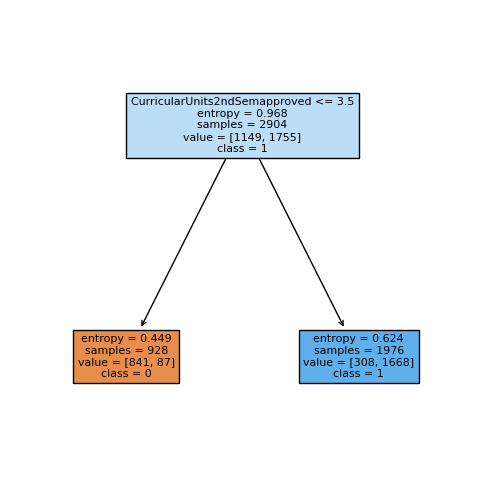

In [31]:
plt.figure(figsize=(6,6))
tree.plot_tree(dt_entropy , filled=True,feature_names=x_train.columns, class_names = [str(i) for i in set(y_train)])
plt.savefig('dt_entropy_class.jpeg' )

### Optimising the model

### Comparing Accuracy Score between Train and Test data

In [32]:
dt_model.score(x_test , y_test)


0.8911845730027548

###  FInding CCP - Alpha Value

In [33]:
path = dt_model.cost_complexity_pruning_path(x , y)
ccp_alpha = path.ccp_alphas

In [34]:
path

{'ccp_alphas': array([0.00000000e+00, 1.36822773e-04, 1.37394092e-04, 1.78553209e-04,
        1.80315552e-04, 1.82208629e-04, 1.83433458e-04, 2.03768292e-04,
        2.06611570e-04, 2.26927736e-04, 2.33520678e-04, 2.44872972e-04,
        2.44872972e-04, 2.44872972e-04, 2.44872972e-04, 2.49245704e-04,
        2.50438267e-04, 2.50438267e-04, 2.52525253e-04, 2.52584881e-04,
        2.53443526e-04, 2.53443526e-04, 2.54291163e-04, 2.54291163e-04,
        2.62363899e-04, 2.62493515e-04, 2.63192068e-04, 2.63504611e-04,
        2.64462810e-04, 2.64886629e-04, 2.66595575e-04, 2.67501215e-04,
        2.69735989e-04, 2.71489600e-04, 2.72241128e-04, 2.72907495e-04,
        2.75482094e-04, 2.75482094e-04, 2.75482094e-04, 2.77681074e-04,
        3.38091660e-04, 3.38345988e-04, 3.39439163e-04, 3.41073068e-04,
        3.47932553e-04, 3.55696079e-04, 3.58371832e-04, 3.60750361e-04,
        3.63708385e-04, 3.67309458e-04, 3.67309458e-04, 3.67309458e-04,
        3.67309458e-04, 3.67309458e-04, 3.67309458

In [35]:
ccp_alpha

array([0.00000000e+00, 1.36822773e-04, 1.37394092e-04, 1.78553209e-04,
       1.80315552e-04, 1.82208629e-04, 1.83433458e-04, 2.03768292e-04,
       2.06611570e-04, 2.26927736e-04, 2.33520678e-04, 2.44872972e-04,
       2.44872972e-04, 2.44872972e-04, 2.44872972e-04, 2.49245704e-04,
       2.50438267e-04, 2.50438267e-04, 2.52525253e-04, 2.52584881e-04,
       2.53443526e-04, 2.53443526e-04, 2.54291163e-04, 2.54291163e-04,
       2.62363899e-04, 2.62493515e-04, 2.63192068e-04, 2.63504611e-04,
       2.64462810e-04, 2.64886629e-04, 2.66595575e-04, 2.67501215e-04,
       2.69735989e-04, 2.71489600e-04, 2.72241128e-04, 2.72907495e-04,
       2.75482094e-04, 2.75482094e-04, 2.75482094e-04, 2.77681074e-04,
       3.38091660e-04, 3.38345988e-04, 3.39439163e-04, 3.41073068e-04,
       3.47932553e-04, 3.55696079e-04, 3.58371832e-04, 3.60750361e-04,
       3.63708385e-04, 3.67309458e-04, 3.67309458e-04, 3.67309458e-04,
       3.67309458e-04, 3.67309458e-04, 3.67309458e-04, 3.67309458e-04,
      

In [36]:
train_score = dt_model.score(x_train , y_train)

### Iterating different values of CCP-Alpha value to form different Decision Tree Models

In [37]:
dt_model2 = []
for ccp in ccp_alpha :
    dt_m =DecisionTreeClassifier(ccp_alpha = ccp)
    dt_m.fit(x_train , y_train)
    dt_model2.append(dt_m)

In [38]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.000136822773186409),
 DecisionTreeClassifier(ccp_alpha=0.00013739409205404128),
 DecisionTreeClassifier(ccp_alpha=0.0001785532088562392),
 DecisionTreeClassifier(ccp_alpha=0.00018031555221637862),
 DecisionTreeClassifier(ccp_alpha=0.00018220862888006705),
 DecisionTreeClassifier(ccp_alpha=0.00018343345835130796),
 DecisionTreeClassifier(ccp_alpha=0.0002037682917582834),
 DecisionTreeClassifier(ccp_alpha=0.00020661157024793388),
 DecisionTreeClassifier(ccp_alpha=0.0002269277357825174),
 DecisionTreeClassifier(ccp_alpha=0.0002335206783498076),
 DecisionTreeClassifier(ccp_alpha=0.0002448729721456994),
 DecisionTreeClassifier(ccp_alpha=0.0002448729721456994),
 DecisionTreeClassifier(ccp_alpha=0.0002448729721456994),
 DecisionTreeClassifier(ccp_alpha=0.0002448729721456994),
 DecisionTreeClassifier(ccp_alpha=0.0002492457037911583),
 DecisionTreeClassifier(ccp_alpha=0.0002504382669671926),
 DecisionTreeClassifier(ccp_alpha=0.00025

### Selecting a model that has less overfitting results

### Finding training score for different Decision Tree Models with different CCP-Alpha Values

In [39]:
train_score = [i.score(x_train , y_train) for i in dt_model2 ]
train_score

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9996556473829201,
 0.9996556473829201,
 0.9993112947658402,
 0.9996556473829201,
 0.9996556473829201,
 0.9993112947658402,
 0.9993112947658402,
 0.9993112947658402,
 0.9996556473829201,
 0.9996556473829201,
 0.9993112947658402,
 0.9996556473829201,
 0.9989669421487604,
 0.9989669421487604,
 0.9993112947658402,
 0.9996556473829201,
 0.9989669421487604,
 0.9993112947658402,
 0.9996556473829201,
 0.9993112947658402,
 0.9993112947658402,
 0.9996556473829201,
 0.9993112947658402,
 0.9989669421487604,
 0.9989669421487604,
 0.9993112947658402,
 0.9996556473829201,
 0.9989669421487604,
 0.9996556473829201,
 0.9993112947658402,
 0.9996556473829201,
 0.9996556473829201,
 0.9993112947658402,
 0.9796831955922864,
 0.9817493112947658,
 0.9803719008264463,
 0.9803719008264463,
 0.9803719008264463,
 0.9817493112947658,
 0.9807162534435262,
 0.9803719008264463,
 0.9803719008264463,
 0.9793388429752066,
 0.9789944903581267,
 0.9796831955922864,
 0.9789944903

In [40]:
test_score = [i.score(x_test , y_test) for i in dt_model2]
test_score

[0.8815426997245179,
 0.8732782369146006,
 0.8746556473829201,
 0.8787878787878788,
 0.8774104683195593,
 0.8829201101928374,
 0.8815426997245179,
 0.8801652892561983,
 0.8774104683195593,
 0.871900826446281,
 0.8829201101928374,
 0.8801652892561983,
 0.8829201101928374,
 0.8732782369146006,
 0.8774104683195593,
 0.8801652892561983,
 0.8732782369146006,
 0.8829201101928374,
 0.8760330578512396,
 0.8787878787878788,
 0.8774104683195593,
 0.8760330578512396,
 0.871900826446281,
 0.8787878787878788,
 0.8856749311294766,
 0.8663911845730028,
 0.8774104683195593,
 0.8787878787878788,
 0.8801652892561983,
 0.8815426997245179,
 0.8787878787878788,
 0.8787878787878788,
 0.8760330578512396,
 0.8732782369146006,
 0.8760330578512396,
 0.8774104683195593,
 0.8787878787878788,
 0.8801652892561983,
 0.8760330578512396,
 0.8787878787878788,
 0.8856749311294766,
 0.8898071625344353,
 0.8939393939393939,
 0.8939393939393939,
 0.8898071625344353,
 0.8925619834710744,
 0.8925619834710744,
 0.892561983471

### Plotting graph between train_score , test_score and ccp_alpha in order to find relationship amoong them
### This will help to find optimal decision tree model

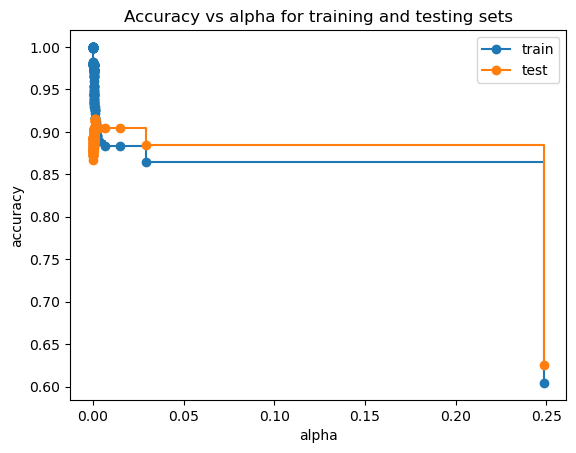

In [41]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### In the above graph, the gap between test and train data has decreased when ccp-alpha value is 0.01

### Optimising the Decision Tree Models by using Hyper-Parameters

In [52]:
dt_model_optimal = DecisionTreeClassifier(ccp_alpha=0.01 , criterion='entropy' ,splitter = 'best' ,max_depth=5)

In [53]:
dt_model_optimal.fit(x_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5)

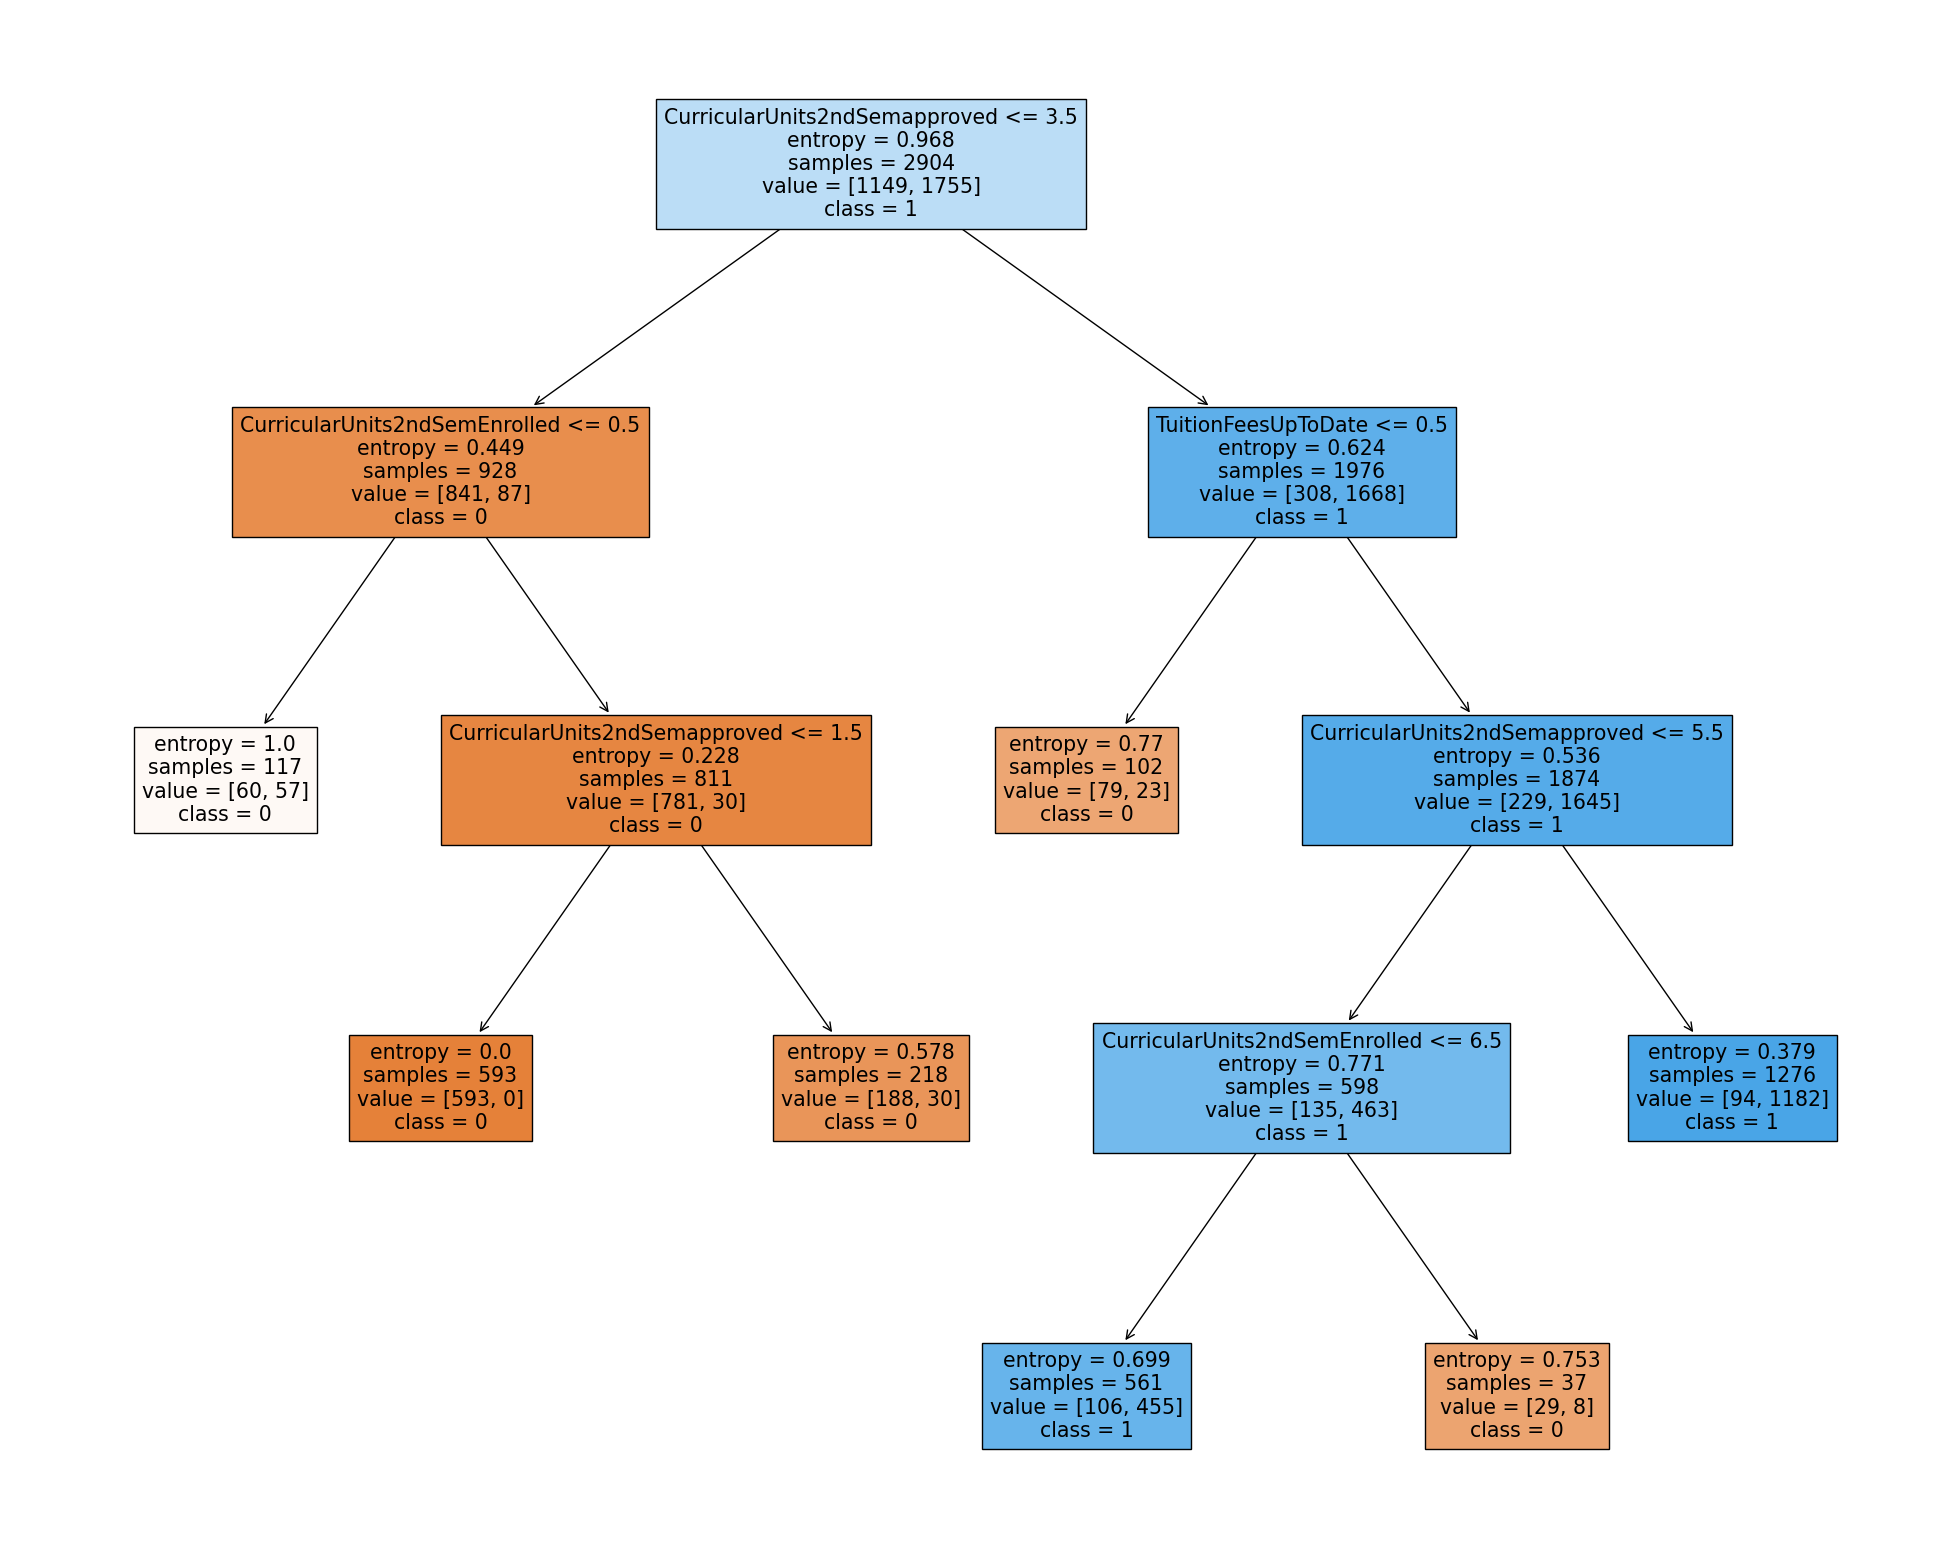

In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model_optimal, feature_names=x_train.columns, filled=True , class_names = [str(i) for i in set(y_train)])
plt.savefig('dt_optimal_mlclass.jpeg')

## Performance Metrics for Decision Tree Model: dt_model_optimal

###  Accuracy Score

In [58]:
y_pred = dt_model_optimal.predict(x_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9077134986225895


###  Precision Score

In [60]:
print("Precsion Score:" , metrics.precision_score(y_test, y_pred , average = None))

Precsion Score: [0.88389513 0.92156863]


### F1 Score

In [61]:
from sklearn.metrics import f1_score
print("F1 Score:" , f1_score(y_test , y_pred , average = None))

F1 Score: [0.87569573 0.92661555]


### Recall Score

In [62]:
from sklearn.metrics import recall_score
print("Recall Score:" , recall_score(y_test , y_pred , average = None))

Recall Score: [0.86764706 0.93171806]


### Confusion Matrix

In [64]:
metrics.confusion_matrix(y_test  ,  y_pred)


array([[236,  36],
       [ 31, 423]], dtype=int64)

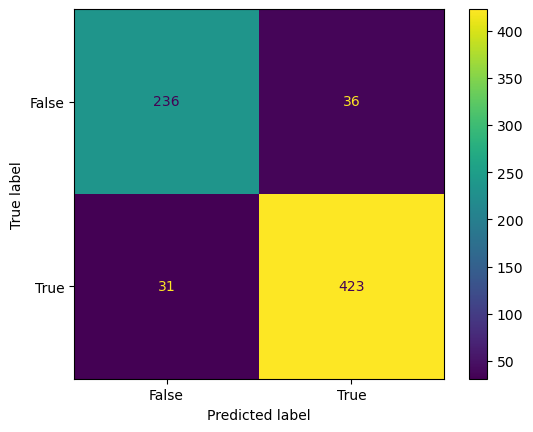

In [65]:

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Classification Report

In [66]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       272
           1       0.92      0.93      0.93       454

    accuracy                           0.91       726
   macro avg       0.90      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



### Cohen Kappa Score

In [67]:
print("cohen_kappa_score:" , cohen_kappa_score(y_test , y_pred))

cohen_kappa_score: 0.8023213284240813


### Receiver Operating Characteristic (ROC) Curve

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("False Positive Rates:" , fpr)
print("True Positive Rates:" , tpr)
print("Threshold:",threshold)

False Positive Rates: [0.         0.13235294 1.        ]
True Positive Rates: [0.         0.93171806 1.        ]
Threshold: [2 1 0]


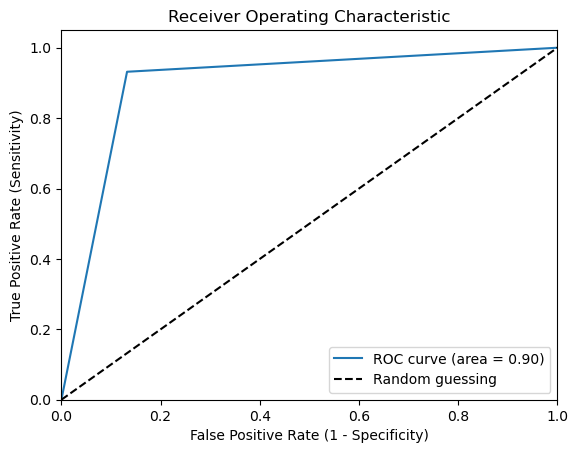

In [75]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Important Features in the Decision Tree Model

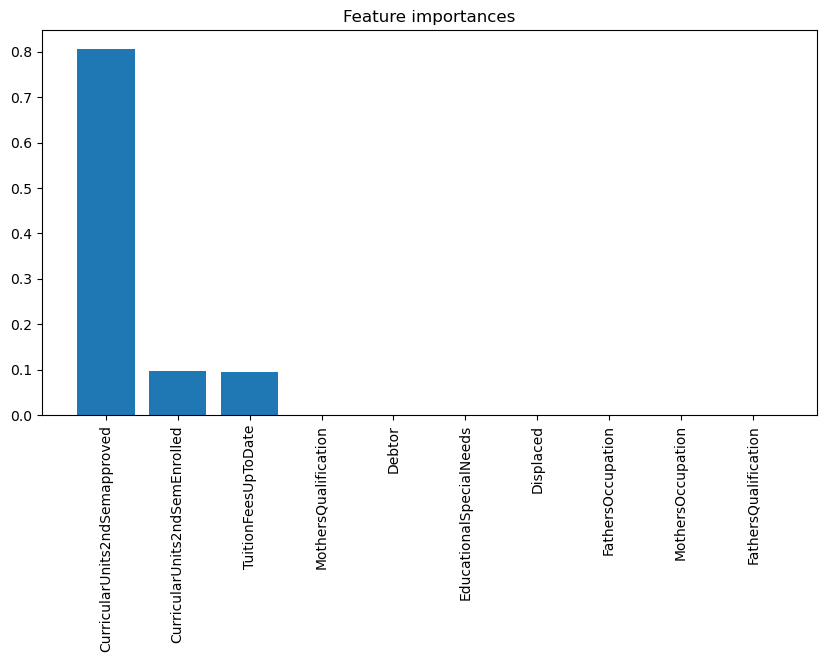

In [78]:
importances = dt_model_optimal.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the top 10 most important features
top_features = x_train.columns[indices][:10]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), top_features, rotation=90)
plt.show()